## CASE STUDY

# 1. Merge the datasets


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cust = pd.read_csv('/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/Customer.csv')              #importing thr datasets
trans = pd.read_csv('/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/Transactions.csv')
prod_cat = pd.read_csv('/Users/priyam/Documents/Assignments/DS_Analytics-in-Retail/prod_cat_info.csv')

In [3]:
#cust.head()              #understanding the data
#trans.head()
#prod_cat.head()
#cust.describe()
#trans.describe()

#trans.duplicated(subset=['transaction_id']) #some insights 

In [4]:
#print (trans.columns)
#print(cust.columns)
#print(prod_cat.columns)

cust.rename(columns = {'customer_Id' : 'cust_id'} , inplace = True)                               #fixing column names to make joins
prod_cat.rename(columns = {'prod_sub_cat_code' : 'prod_subcat_code'} , inplace = True)

#cust.head(2)
#prod_cat.head(2)

In [5]:
final = trans.merge(cust,on = 'cust_id', how = 'left').merge(prod_cat,on = ['prod_cat_code', 'prod_subcat_code'],how = 'left')  #final dataset with all the data,"join"
final.head(2)                  
#final.shape


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,26-09-1981,M,5.0,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,11-05-1973,F,8.0,Electronics,Computers


# 2. Check the duplicates if there are any duplicates drop them.


In [6]:
print("total duplicates in final dataset:" ,final.duplicated().sum())

total duplicates in final dataset: 13


In [7]:
final.describe()
#print(final.shape)
#final.drop_duplicates(keep = 'first', inplace = True) 
#print(final.shape)



,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,10.000000


# 3. Check for the null/missing values.


In [8]:
print(final.shape)
print(final.isnull().sum())        #checking for null values in dataset

(23053, 15)
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
DOB                 0
Gender              9
city_code           8
prod_cat            0
prod_subcat         0
dtype: int64


# 4. Prepare summary report for all the columns.


<AxesSubplot:ylabel='Frequency'>

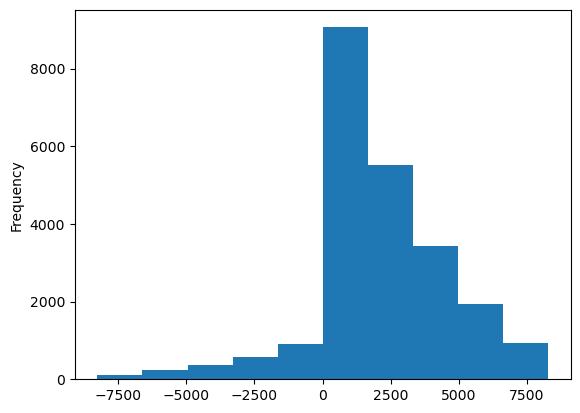

In [9]:
final['total_amt'].plot(kind = 'hist')


<AxesSubplot:ylabel='Frequency'>

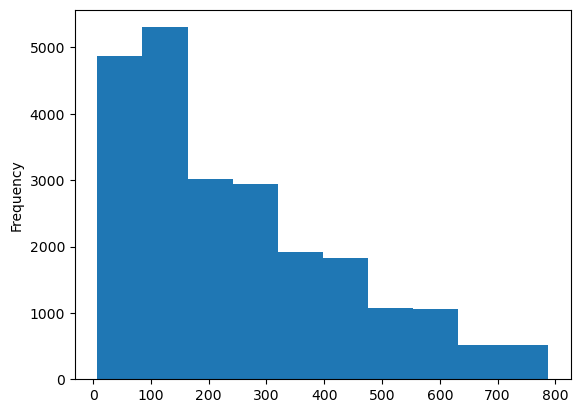

In [10]:
final['Tax'].plot(kind = 'hist')

<AxesSubplot:xlabel='prod_cat_code', ylabel='Rate'>

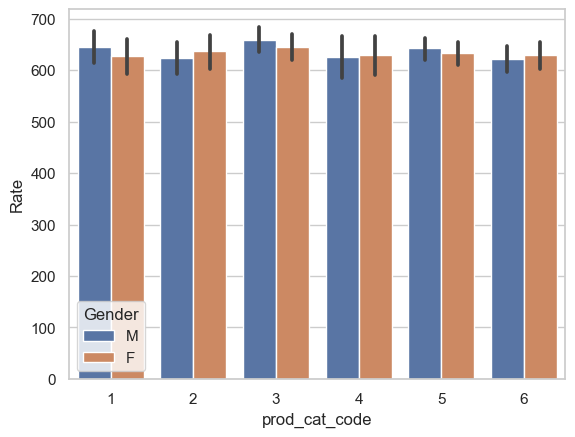

In [11]:
sns.set(style='whitegrid')
sns.barplot(x="prod_cat_code",
                    y="Rate",
                    hue="Gender",
                    data=final)

# 5. Find the percentage of products bought by men and women(clothes).

In [120]:
clothes = final.loc[final["prod_cat_code"] == (1), ['Gender']]
clothes.shape


(2960, 1)

In [121]:
Gen_counts= clothes["Gender"].value_counts()

In [122]:
print(Gen_counts)
Gender_per = Gen_counts *100/( clothes.shape[0] )
print(Gender_per)


M    1518
F    1439
Name: Gender, dtype: int64
M    51.283784
F    48.614865
Name: Gender, dtype: float64


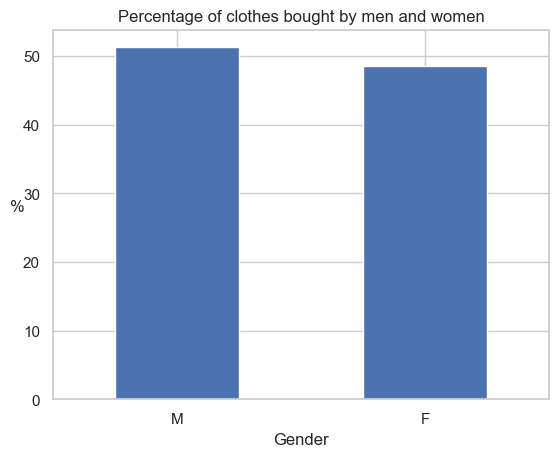

In [123]:
Gender_per.plot.bar()
plt.xlabel('Gender')
plt.ylabel('%' , rotation = 0)
plt.xticks(rotation = 0)
plt.title('Percentage of clothes bought by men and women')
plt.show()

# 6. Find the percentage of products bought by men and women(footwear).

In [124]:
footwear = final.loc[final["prod_cat_code"] == (2), ['Gender']]

In [125]:
Gen_counts= footwear["Gender"].value_counts()
print(Gen_counts)
Gender_per = Gen_counts *100/( footwear.shape[0] )
print(Gender_per)

F    1529
M    1469
Name: Gender, dtype: int64
F    50.983661
M    48.982994
Name: Gender, dtype: float64


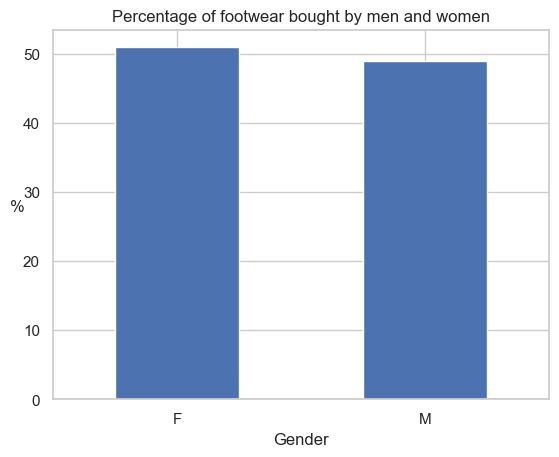

In [126]:
Gender_per.plot.bar()
plt.xlabel('Gender')
plt.ylabel('%' , rotation = 0)
plt.xticks(rotation = 0)
plt.title('Percentage of footwear bought by men and women')
plt.show()

# 7. How many types of stores are there,and which type ofstores sells maximum of products?

In [127]:
stores_count = final["Store_type"].value_counts()

In [128]:
stores_count

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

e-shop sells maximum products

In [129]:
stores_cper = stores_count *100 / final.shape[0]
stores_cper

e-Shop            40.389537
MBR               20.218627
Flagship store    19.854249
TeleShop          19.537587
Name: Store_type, dtype: float64

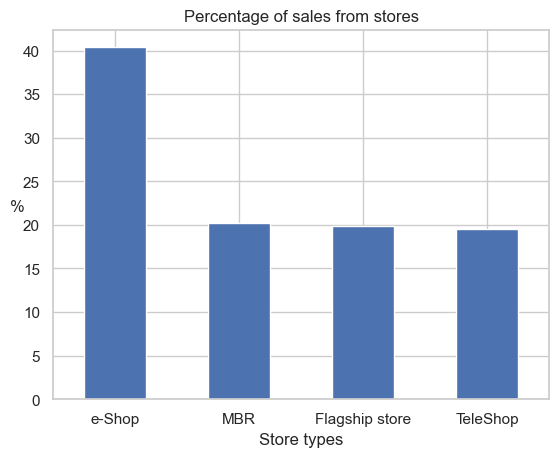

In [130]:
stores_cper.plot.bar()
plt.xlabel('Store types')
plt.ylabel('%' , rotation = 0)
plt.xticks(rotation = 0)
plt.title('Percentage of sales from stores')
plt.show()

# 8. Which type of book is selling the most?

In [131]:
books = final.loc[final["prod_cat_code"] == 5, ['prod_subcat']]

In [132]:
books.value_counts()

prod_subcat
Fiction        1043
Children       1035
Comics         1031
Non-Fiction    1004
DIY             989
Academic        967
dtype: int64

In [133]:
books_per = books.value_counts() *100 / books.shape[0]
books_per

prod_subcat
Fiction        17.185698
Children       17.053880
Comics         16.987972
Non-Fiction    16.543088
DIY            16.295930
Academic       15.933432
dtype: float64